<a href="https://colab.research.google.com/github/zimin205/BDA_Data/blob/main/%EB%B9%84%EC%A6%88_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EC%9A%94%EC%B2%AD%EA%B1%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/BDA 데이터팀/DB/학회원DB/DB_sheet/features_N/features_10.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 5s (1,961 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126210 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts/truetype/nanum/N

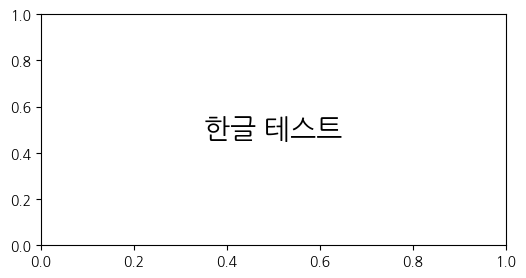

In [ ]:
# %% [code]
# 1️⃣ NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install -y fonts-nanum

# 2️⃣ Matplotlib에서 폰트 캐시를 갱신
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 한글 폰트 경로 확인 (설치된 폰트 목록 확인)
!fc-list :lang=ko | grep Nanum

# 3️⃣ Matplotlib에서 사용할 폰트 경로 지정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 4️⃣ 폰트 적용
fm.fontManager.addfont(font_path)  # 폰트 매니저에 추가
plt.rcParams['font.family'] = ['NanumGothic']


# 5️⃣ Matplotlib 폰트 캐시 삭제 후 강제 갱신
!rm -rf ~/.cache/matplotlib
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 6️⃣ 폰트 적용 테스트 (한글 출력 확인)
plt.figure(figsize=(6,3))
plt.text(0.5, 0.5, "한글 테스트", fontsize=20, ha='center', va='center')
plt.show()

In [ ]:
df.columns.tolist()


['member_id',
 'member_name',
 'generation',
 'birthday',
 'email',
 'phone_number',
 'school1',
 'major1_1',
 'major1_2',
 'major1_3',
 'school2',
 'major2',
 'job',
 'job_domain',
 'company',
 'major_data',
 'class1',
 'class2',
 'class3',
 'class4',
 'withdrawal',
 're_registration',
 'inflow_route',
 'insta_entry_content',
 'insta_entry_channel',
 'insta_interesting_content',
 'insta_uninteresting_content',
 'whyBDA_insta',
 'insta_desired_content',
 'whyBDA',
 'previous_class_3',
 'previous_class_4',
 'previous_class_5',
 'previous_class_6',
 'previous_class_7',
 'previous_class_8',
 'previous_class_9',
 'satisfying_activity_re_registration',
 'expected_activity_re_registration',
 'reson_re_registeration',
 'whyBDA_re_registeration',
 'nationality',
 'sex',
 'resisdence',
 'detail_resisdence',
 'desired_class_count',
 'desired_activity_general',
 'desired_class1',
 'desired_class1_reason',
 'desired_class2_1',
 'desired_class2_reason1',
 'desired_class2_2',
 'desired_class2_reason

<ipython-input-19-c76c3fa6d654>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_skills_nonmajor = df_nonmajor[skill_cols].replace(skill_map)
<ipython-input-19-c76c3fa6d654>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_skills.values, y=mean_skills.index, palette="pastel")


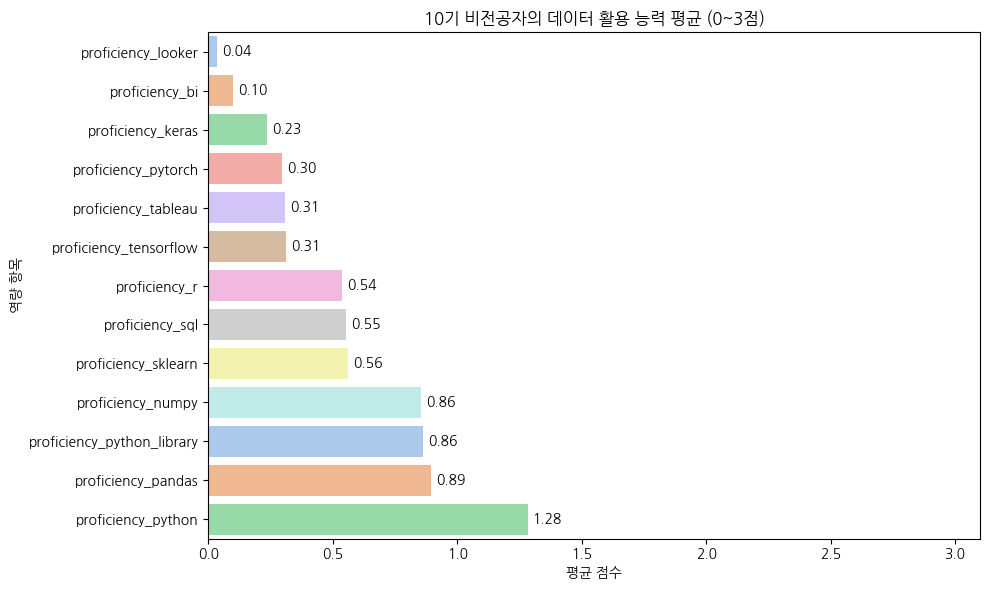

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 10기 데이터만 필터링
df_10 = df[df["generation"] == 10]

# 🎯 숙련도 매핑 사전 (순서형)
skill_map = {
    "고급": 3,
    "중급": 2,
    "초급": 1,
    "사용해본 적 없음": 0
}

# 🎯 숙련도 컬럼
skill_cols = [
    'proficiency_python', 'proficiency_sql', 'proficiency_r',
    'proficiency_pandas', 'proficiency_numpy', 'proficiency_sklearn',
    'proficiency_pytorch', 'proficiency_tensorflow', 'proficiency_keras',
    'proficiency_looker', 'proficiency_tableau', 'proficiency_bi',
    'proficiency_python_library'
]

# ---------------------------
# 📌 1. 비전공자의 평균 숙련도 시각화
# ---------------------------
df_nonmajor = df_10[df_10["major_data"] == False]
df_skills_nonmajor = df_nonmajor[skill_cols].replace(skill_map)
mean_skills = df_skills_nonmajor.mean().sort_values()


plt.figure(figsize=(10, 6))
ax = sns.barplot(x=mean_skills.values, y=mean_skills.index, palette="pastel")

# ✅ 여기! 막대 옆에 숫자 라벨 붙이기
for i, (value, name) in enumerate(zip(mean_skills.values, mean_skills.index)):
    ax.text(value + 0.02, i, f"{value:.2f}", va='center', fontsize=10)

plt.title("10기 비전공자의 데이터 활용 능력 평균 (0~3점)")
plt.xlabel("평균 점수")
plt.ylabel("역량 항목")
plt.xlim(0, 3.1)  # 전체 점수 범위 조정 (선택)
plt.tight_layout()
plt.show()


In [ ]:
# 숙련도 매핑
skill_map = {"고급": 3, "중급": 2, "초급": 1, "사용해본 적 없음": 0}

# 숙련도 컬럼 리스트
skill_cols = [
    'proficiency_python', 'proficiency_sql', 'proficiency_r',
    'proficiency_pandas', 'proficiency_numpy', 'proficiency_sklearn',
    'proficiency_pytorch', 'proficiency_tensorflow', 'proficiency_keras',
    'proficiency_looker', 'proficiency_tableau', 'proficiency_bi',
    'proficiency_python_library'
]

# 10기 & 비전공자 필터링
df_10 = df[df["generation"] == 10]
df_nonmajor = df_10[df_10["major_data"] == False]

# 숙련도 등급 숫자로 변환
df_skills_nonmajor = df_nonmajor[skill_cols].replace(skill_map)

# 평균 계산
mean_skills = df_skills_nonmajor.mean().sort_values()

# 데이터프레임으로 출력
df_skill_scores = mean_skills.reset_index()
df_skill_scores.columns = ['Skill', 'Average Score']

# 결과 출력
print(df_skill_scores)


                         Skill  Average Score
0           proficiency_looker       0.036468
1               proficiency_bi       0.097889
2            proficiency_keras       0.234165
3          proficiency_pytorch       0.297505
4          proficiency_tableau       0.309021
5       proficiency_tensorflow       0.312860
6                proficiency_r       0.537428
7              proficiency_sql       0.552783
8          proficiency_sklearn       0.560461
9            proficiency_numpy       0.856046
10  proficiency_python_library       0.863724
11          proficiency_pandas       0.894434
12          proficiency_python       1.282150


<ipython-input-13-82769a27f367>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_skills_nonmajor = df_nonmajor[skill_cols].replace(skill_map)


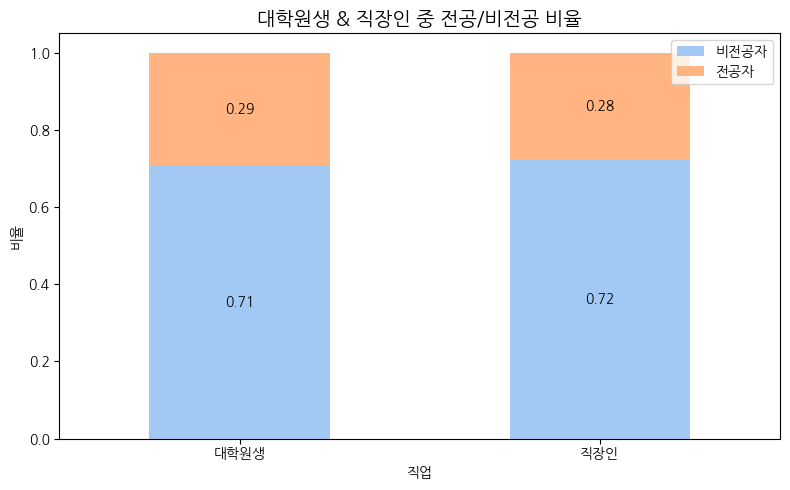

major_data     False     True 
job                           
대학원생        0.705882  0.294118
직장인         0.722222  0.277778


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🎯 10기에서 직장인/대학원생만 추출
target_jobs = ["직장인", "대학원생"]
df_target = df_10[df_10["job"].isin(target_jobs)]

# ✅ 전공/비전공 비율 계산
job_major_ct = pd.crosstab(df_target["job"], df_target["major_data"])  # 컬럼 = major_data
job_major_ct_ratio = job_major_ct.div(job_major_ct.sum(axis=1), axis=0)  # 비율화

# ✅ 시각화
colors = sns.color_palette("pastel")  # 파스텔톤 색상 자동 추출
ax = job_major_ct_ratio.plot(kind="bar", stacked=True, figsize=(8, 5), color=colors)

# ✅ 막대 위에 비율 숫자 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', fontsize=10, color='black')

plt.title("대학원생 & 직장인 중 전공/비전공 비율", fontsize=14)
plt.xlabel("직업")
plt.ylabel("비율")
plt.xticks(rotation=0)
plt.legend(["비전공자", "전공자"], loc='upper right')
plt.tight_layout()
plt.show()

# ✅ 실제 비율 데이터 출력 (원하는 경우)
print(job_major_ct_ratio)


<ipython-input-21-ec1d82c19cbd>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=prev_jobs.values, y=prev_jobs.index, palette="pastel")


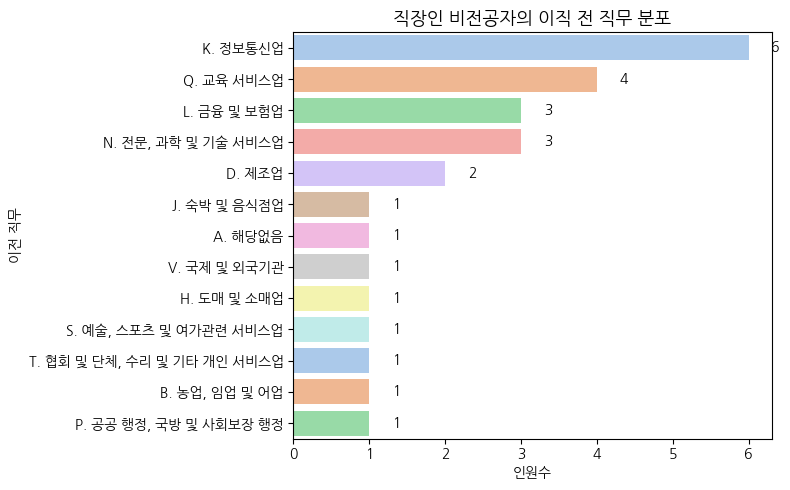

<ipython-input-21-ec1d82c19cbd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=desired_jobs.values, y=desired_jobs.index, palette="pastel")


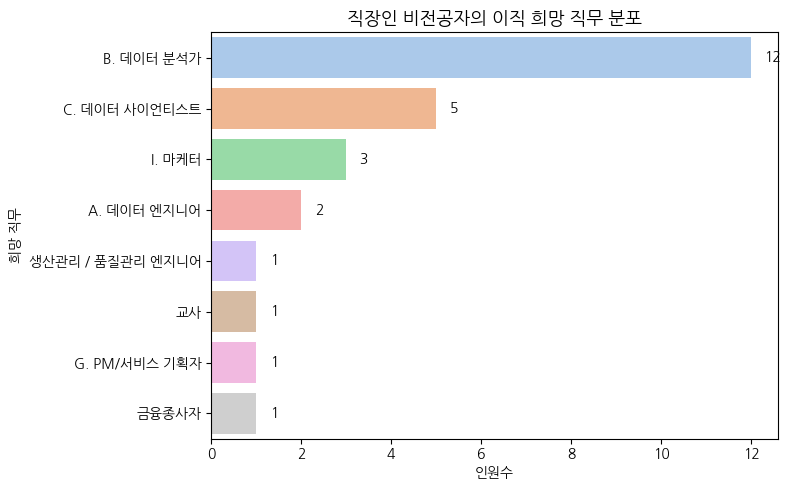

                             직무  이전 인원수
0                      K. 정보통신업       6
1                    Q. 교육 서비스업       4
2                   L. 금융 및 보험업       3
3           N. 전문, 과학 및 기술 서비스업       3
4                        D. 제조업       2
5                  J. 숙박 및 음식점업       1
6                       A. 해당없음       1
7                  V. 국제 및 외국기관       1
8                   H. 도매 및 소매업       1
9        S. 예술, 스포츠 및 여가관련 서비스업       1
10  T. 협회 및 단체, 수리 및 기타 개인 서비스업       1
11               B. 농업, 임업 및 어업       1
12       P. 공공 행정, 국방 및 사회보장 행정       1
              희망 직무  희망 인원수
0        B. 데이터 분석가      12
1     C. 데이터 사이언티스트       5
2            I. 마케터       3
3       A. 데이터 엔지니어       2
4  생산관리 / 품질관리 엔지니어       1
5                교사       1
6     G. PM/서비스 기획자       1
7             금융종사자       1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 직장인 + 비전공자 필터링
df_job_change = df_10[(df_10["job"] == "직장인") & (df_10["major_data"] == False)]

# ✅ 이직 전 직무 분포 계산
prev_jobs = df_job_change["job_domain"].value_counts()

# ✅ 희망 직무 분포 계산
desired_jobs = df_job_change["desired_job"].value_counts()

# -------------------------------
# ✅ 이직 전 직무 시각화
# -------------------------------
plt.figure(figsize=(8, 5))
ax1 = sns.barplot(x=prev_jobs.values, y=prev_jobs.index, palette="pastel")

# 라벨 표시
for i, v in enumerate(prev_jobs.values):
    ax1.text(v + 0.3, i, str(v), va='center', fontsize=10)

plt.title("직장인 비전공자의 이직 전 직무 분포", fontsize=13)
plt.xlabel("인원수")
plt.ylabel("이전 직무")
plt.tight_layout()
plt.show()

# -------------------------------
# ✅ 희망 직무 시각화
# -------------------------------
plt.figure(figsize=(8, 5))
ax2 = sns.barplot(x=desired_jobs.values, y=desired_jobs.index, palette="pastel")

# 라벨 표시
for i, v in enumerate(desired_jobs.values):
    ax2.text(v + 0.3, i, str(v), va='center', fontsize=10)

plt.title("직장인 비전공자의 이직 희망 직무 분포", fontsize=13)
plt.xlabel("인원수")
plt.ylabel("희망 직무")
plt.tight_layout()
plt.show()

# -------------------------------
# ✅ (선택) 데이터프레임으로도 출력하고 싶다면:
# -------------------------------
df_prev = prev_jobs.reset_index()
df_prev.columns = ['직무', '이전 인원수']

df_desired = desired_jobs.reset_index()
df_desired.columns = ['희망 직무', '희망 인원수']

print(df_prev)
print(df_desired)


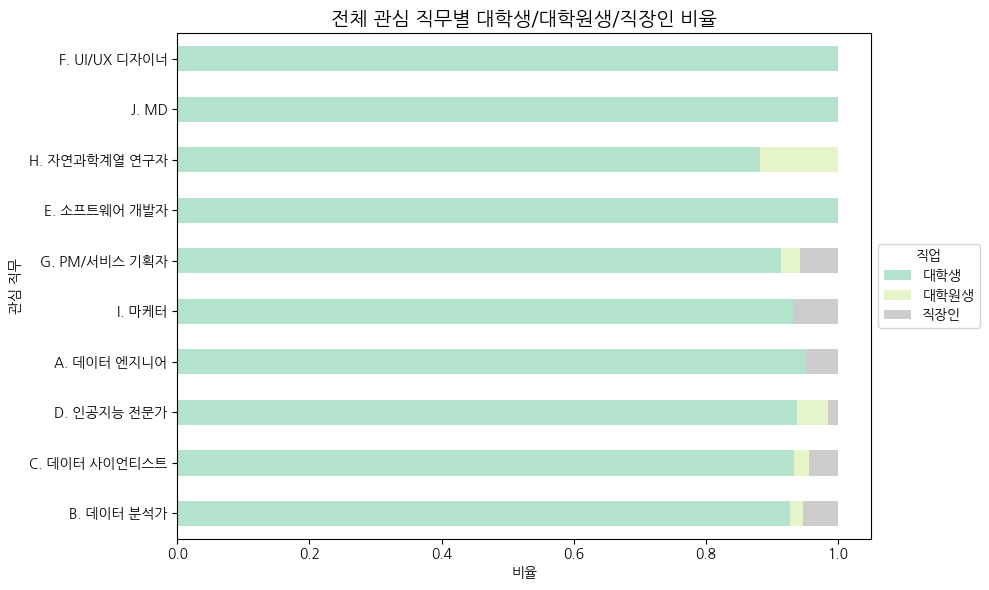

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 🎯 10기 & 희망 직무 + 직업 필터링
df_10 = df[df["generation"] == 10]
df_valid = df_10[df_10["desired_job"].notna() & df_10["job"].notna()]
df_valid = df_valid[df_valid["job"].isin(["대학생", "대학원생", "직장인"])]

# 🎯 관심 직무별 직업 비율 계산
pivot = pd.crosstab(df_valid["desired_job"], df_valid["job"], normalize='index')

# 🎯 상위 관심 직무 N개만 시각화
top_n = 10
top_jobs = df_valid["desired_job"].value_counts().head(top_n).index
pivot_subset = pivot.loc[top_jobs]

# 🎯 시각화 (수평 누적 막대그래프)
pivot_subset.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Pastel2')
plt.title("전체 관심 직무별 대학생/대학원생/직장인 비율", fontsize=14)
plt.xlabel("비율")
plt.ylabel("관심 직무")
plt.legend(title="직업", loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [ ]:
# 10기 데이터 중 desired_job 있는 사람만 필터링
df_10 = df[df["generation"] == 10]
df_valid = df_10[df_10["desired_job"].notna()]

# 'A. ~ J.' 로 시작하는 선택형 응답만 추출
import re
pattern = r"^[A-J]\."

# 선택지에 없는 주관식 응답만 필터링 (기타)
df_etc = df_valid[~df_valid["desired_job"].str.match(pattern)]

# 결과 출력
print(f"기타(주관식) 응답자 수: {len(df_etc)}명")

# (선택) 기타 응답 내용 확인
print(df_etc["desired_job"].value_counts())


기타(주관식) 응답자 수: 57명
desired_job
반도체 엔지니어                                        5
미정                                              4
품질관리직                                           2
배터리 소재 엔지니어                                     1
자산운용사                                           1
데이터 처리 관련 직종, 마케터, 금융 등 다양한 분야에 관심을 두고 있습니다.    1
공정 엔지니어                                         1
생산/품질관리                                         1
직장인이 아님                                         1
HR Manager (미정), 창업가                            1
아직 미정                                           1
생산관리 / 품질관리 엔지니어                                1
공인회계사                                           1
경영 컨설턴트                                         1
서비스 기획자 or 인공지능 전문가                             1
정보보안 전문가                                        1
데이터 컨설턴트                                        1
반도체 공정기술                                        1
스포츠 전력 분석가                                      1
데이터 사이언스, AI, 소프트웨어

In [ ]:
# 예시: 카테고리별 키워드 매핑
category_map = {
    "반도체/배터리 엔지니어": ["반도체", "공정", "배터리", "생산"],
    "품질관리": ["품질관리", "생산관리"],
    "HR/인사": ["HR", "헤드헌터", "인사"],
    "금융/회계": ["자산운용", "회계사", "계리사", "은행", "금공", "금융", "재무"],
    "데이터 직무": ["데이터", "컨설턴트", "저널리스트"],
    "기획/PM": ["기획", "PM", "기획자"],
    "연구직": ["연구", "과학", "로보틱스"],
    "개발/IT": ["웹개발", "프론트엔드", "IT", "소프트웨어"],
    "교육/교사": ["교사", "출판", "PD"],
    "마케팅": ["마케터", "마케팅"],
    "계획 없음/미정": ["미정", "계획 없음", "모르겠습니다"],
}

# 카테고리 분류 함수
def categorize_response(text):
    for category, keywords in category_map.items():
        if any(keyword in text for keyword in keywords):
            return category
    return "기타"

# 적용
df_etc["기타_분류"] = df_etc["desired_job"].apply(categorize_response)

# 분류별 개수 보기
print(df_etc["기타_분류"].value_counts())


기타_분류
반도체/배터리 엔지니어    13
기타               9
금융/회계            8
계획 없음/미정         6
데이터 직무           6
품질관리             4
HR/인사            3
연구직              3
기획/PM            2
마케팅              1
교육/교사            1
개발/IT            1
Name: count, dtype: int64


<ipython-input-27-bea8ddc0f146>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etc["기타_분류"] = df_etc["desired_job"].apply(categorize_response)
